In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples = n_samples, noise = 0.03, random_state= 42)

In [4]:
print(f"First 5 X values:\n{X[:5]}\nFirst 5 y values:\n{y[:5]}")

First 5 X values:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 y values:
[1 1 1 1 0]


In [5]:
import pandas as pd
df = pd.DataFrame({"X1": X[:, 0],
                   "X2": X[:, 1],
                  "label": y
                  })

In [6]:
df.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


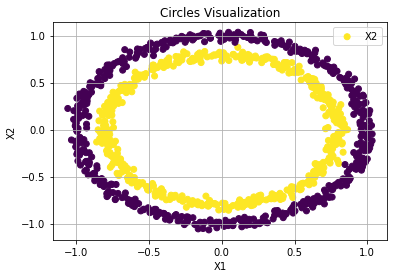

In [12]:
def plot_predictions():
    plt.scatter(data = df, x ="X1", y = "X2", c = 'label')
    plt.title("Circles Visualization")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid()
    plt.legend()

plot_predictions()

In [16]:
X.shape, y.shape

((1000, 2), (1000,))

In [19]:
X_tensor = torch.tensor(X, dtype = torch.float32)
y_tensor = torch.tensor(y, dtype = torch.float32)

X_tensor.shape, y_tensor.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size= 0.2, random_state= 42)

In [22]:
X_train.shape

torch.Size([800, 2])

In [23]:
# Lets build a model

device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [24]:
from torch import nn

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features= 2, out_features= 5) # takes 2 featues and upsacles to 5 features
        self.layer_2 = nn.Linear(in_features= 5, out_features= 1)
        
    def forward(self, x: torch.tensor) -> torch.tensor:
        # x -> layer_1 -> layer_2
        return self.layer_2(self.layer_1(x))

In [27]:
model_0 = CircleModelV0().to(device)

In [32]:
next(model_0.parameters()).device

device(type='cpu')